In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [11]:
def handlerate(value):
    value= str(value).split('/')
    value = value[0];
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handlerate)
print(dataframe.head)

<bound method NDFrame.head of                       name online_order book_table  rate  votes  \
0                    Jalsa          Yes        Yes   4.1    775   
1           Spice Elephant          Yes         No   4.1    787   
2          San Churro Cafe          Yes         No   3.8    918   
3    Addhuri Udupi Bhojana           No         No   3.7     88   
4            Grand Village           No         No   3.8    166   
..                     ...          ...        ...   ...    ...   
143       Melting Melodies           No         No   3.3      0   
144        New Indraprasta           No         No   3.3      0   
145           Anna Kuteera          Yes         No   4.0    771   
146                 Darbar           No         No   3.0     98   
147          Vijayalakshmi          Yes         No   3.9     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2           

Text(0.5, 0, 'type of restorent')

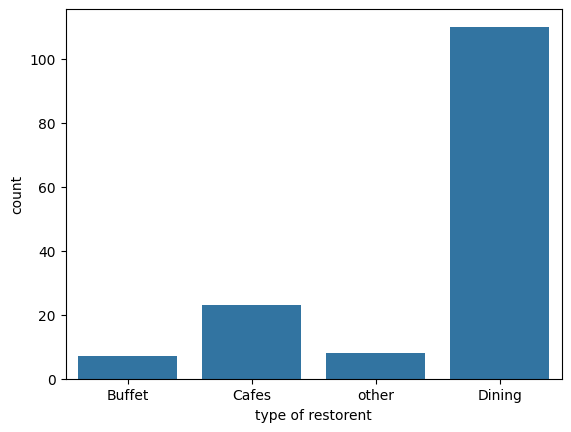

In [20]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("type of restorent")

Maximum order from Dining restourents

Text(0, 0.5, 'Votes')

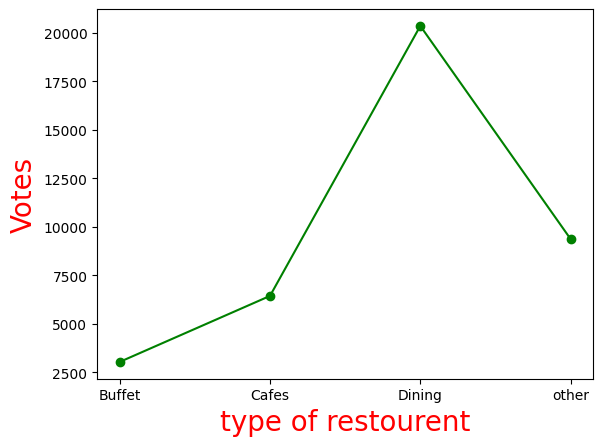

In [13]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result, c='green', marker = 'o')
plt.xlabel("type of restourent",c='red', size=20)
plt.ylabel("Votes",c='red', size =20)

Dining restourent have highest votes . Buffet requires some changs for growth

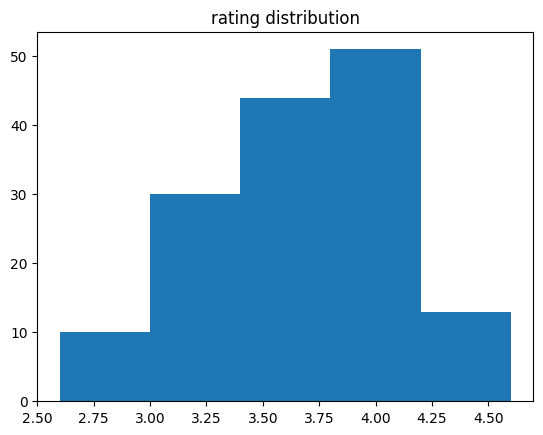

In [14]:
plt.hist(dataframe['rate'],bins =5)
plt.title('rating distribution')
plt.show()

Maximum people rate from 3.5 to 4.0

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

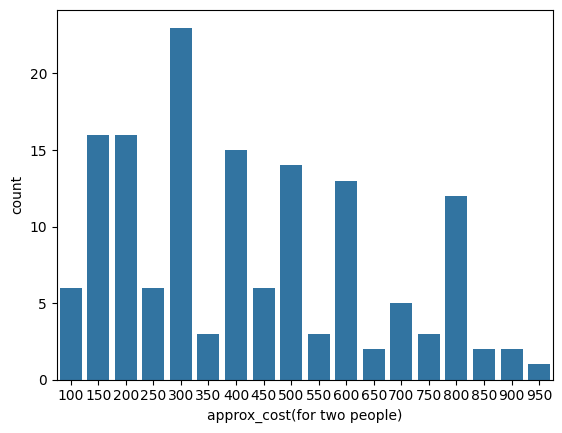

In [15]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

Conclusion: Majrity of couples order within approximate 300rs

<Axes: xlabel='online_order', ylabel='rate'>

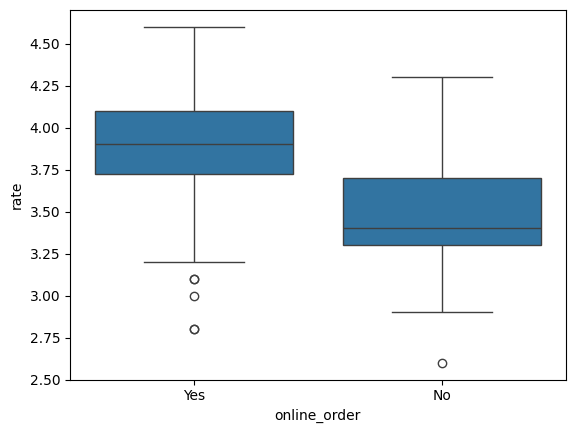

In [16]:
sns.boxplot(x='online_order', y='rate', data = dataframe)

Maximum of orders order through online 

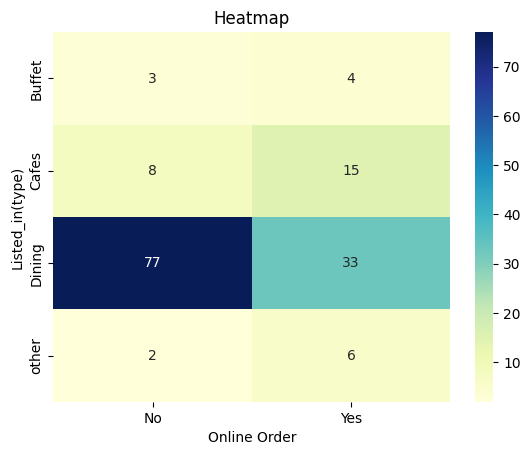

In [19]:
pivot_table = dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True, cmap="YlGnBu",fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed_in(type)")
plt.show()

Conllusion: Dining restaurants primarily accept offline order, whereas cafes primarily receive online orders. 
This suggests that clients prefers orders in person at restaurants, but prefer online ordering cafe 